<a href="https://colab.research.google.com/github/oldhero5/polka_price_predictor/blob/main/polka_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summary: Many Parts impact the cryptocurrency ecosystem. In this quick notebook were going to use the prophet to predict the next 24 hours of trading.

In [41]:
#! pip3 install yfinance prophet

# Raw Package
import numpy as np
import pandas as pd
from prophet import Prophet
import plotly
#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

In [42]:
data = yf.download(tickers='DOT-USD', period = '60d', interval = '15m')

[*********************100%***********************]  1 of 1 completed


In [43]:
#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Polkadot Live Prices',
    yaxis_title=' Polkadot Price (kUS Dollars)')


#Show
fig.show()

In [44]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-12-18 00:00:00+00:00,24.676815,24.713116,24.377035,24.452091,24.452091,0
2021-12-18 00:15:00+00:00,24.416077,24.557802,24.410149,24.410149,24.410149,3023488
2021-12-18 00:30:00+00:00,24.533470,24.804392,24.526613,24.758406,24.758406,13488384
2021-12-18 00:45:00+00:00,24.821259,24.913391,24.796045,24.913391,24.913391,7413120
2021-12-18 01:00:00+00:00,24.909811,24.909811,24.541645,24.541645,24.541645,0
...,...,...,...,...,...,...
2022-02-04 13:15:00+00:00,19.403679,19.473629,19.303938,19.316822,19.316822,6899840
2022-02-04 13:30:00+00:00,19.316980,19.316980,18.977924,19.067432,19.067432,23770368
2022-02-04 13:45:00+00:00,19.063524,19.112169,19.030054,19.033176,19.033176,11571200


In [45]:
# Adjust data for Input into the prophet model
data.reset_index(inplace=True)
data[["Datetime","Close"]]
dict = {'Datetime': 'ds',
        'Close': 'y'}
data.rename(columns = dict,
                 inplace = True)
data['ds']=data['ds'].astype(str).str[:-6]
data.head()


,ds,Open,High,Low,y,Adj Close,Volume
0,2021-12-18 00:00:00,24.676815,24.713116,24.377035,24.452091,24.452091,0
1,2021-12-18 00:15:00,24.416077,24.557802,24.410149,24.410149,24.410149,3023488
2,2021-12-18 00:30:00,24.533470,24.804392,24.526613,24.758406,24.758406,13488384
3,2021-12-18 00:45:00,24.821259,24.913391,24.796045,24.913391,24.913391,7413120
4,2021-12-18 01:00:00,24.909811,24.909811,24.541645,24.541645,24.541645,0


In [76]:
# Create the prophet object
m = Prophet()
m.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [77]:
#Build the future dataframe in this case 48 is equal to 12 hours
future = m.make_future_dataframe(periods = 192, freq = '15min')
future.tail()

,ds
4800,2022-02-06 13:02:00
4801,2022-02-06 13:17:00
4802,2022-02-06 13:32:00
4803,2022-02-06 13:47:00
4804,2022-02-06 14:02:00


In [78]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4800,2022-02-06 13:02:00,19.548931,18.142875,21.425709
4801,2022-02-06 13:17:00,19.562177,18.126572,21.439979
4802,2022-02-06 13:32:00,19.576817,17.986561,21.322140
4803,2022-02-06 13:47:00,19.592727,18.095557,21.343202
4804,2022-02-06 14:02:00,19.609698,18.171066,21.446435


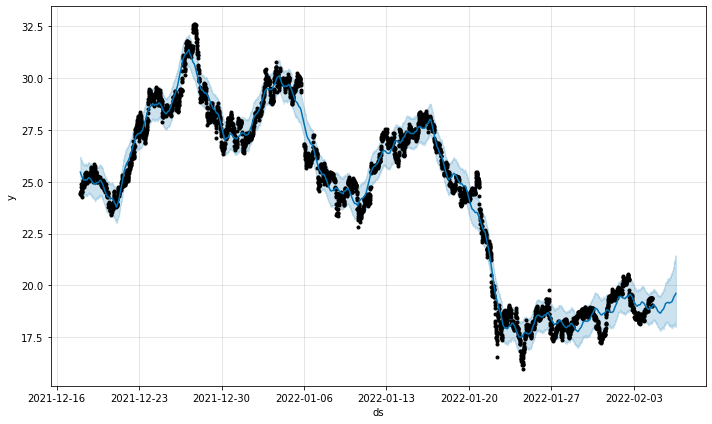

In [79]:
# Plot the predictions
fig1 = m.plot(forecast)


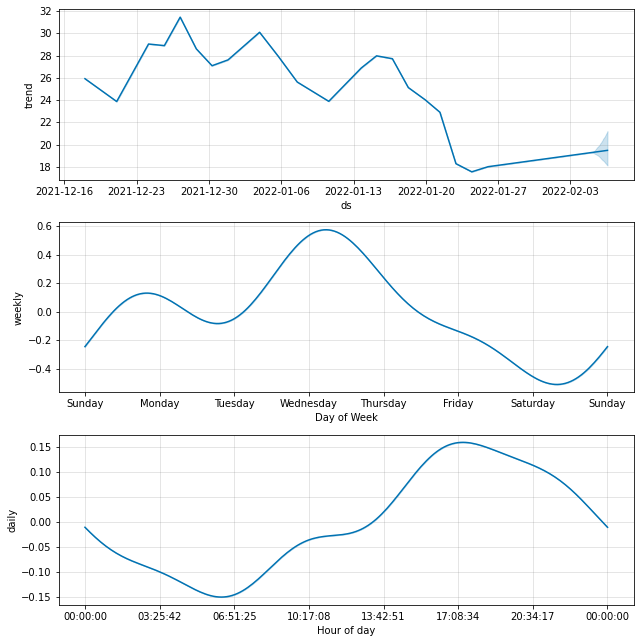

In [80]:
fig2 = m.plot_components(forecast)


In [81]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

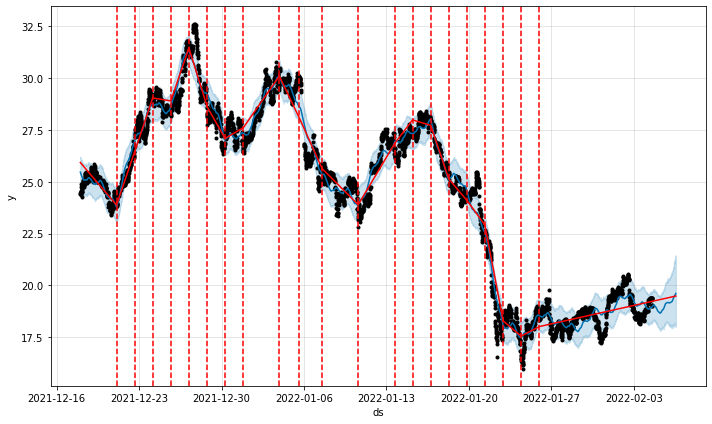

In [82]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


Now lets look at AVAX

In [53]:
avax= yf.download(tickers='AVAX-USD', period = '60d', interval = '15m')

[*********************100%***********************]  1 of 1 completed


In [54]:
#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=avax.index,
                open=avax['Open'],
                high=avax['High'],
                low=avax['Low'],
                close=avax['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Avalanche Live Prices',
    yaxis_title=' Avalanche Price (kUS Dollars)')


#Show
fig.show()

In [55]:
# Adjust data for Input into the prophet model
avax.reset_index(inplace=True)
avax[["Datetime","Close"]]
dict = {'Datetime': 'ds',
        'Close': 'y'}
avax.rename(columns = dict,
                 inplace = True)
avax['ds']=avax['ds'].astype(str).str[:-6]
avax.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2021-12-07 00:00:00,93.347420,93.950531,93.119972,93.767502,93.767502,7661824
1,2021-12-07 00:15:00,94.573418,94.573418,93.645462,94.022453,94.022453,1439744
2,2021-12-07 00:30:00,94.353340,94.511574,93.467506,94.472221,94.472221,13109120
3,2021-12-07 00:45:00,94.352699,94.937935,94.035431,94.807953,94.807953,8134016
4,2021-12-07 01:00:00,94.890717,95.056671,94.339294,94.940422,94.940422,6935936


In [56]:
# Create the prophet object
m = Prophet()
m.fit(avax)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [66]:
#Build the future dataframe in this case 48 is equal to 12 hours
future = m.make_future_dataframe(periods = 192, freq = "15min")
future

,ds
0,2021-12-07 00:00:00
1,2021-12-07 00:15:00
2,2021-12-07 00:30:00
3,2021-12-07 00:45:00
4,2021-12-07 01:00:00
...,...
5850,2022-02-06 13:02:00
5851,2022-02-06 13:17:00
5852,2022-02-06 13:32:00
5853,2022-02-06 13:47:00


In [67]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5850,2022-02-06 13:02:00,74.064195,67.956412,80.374362
5851,2022-02-06 13:17:00,74.107656,68.001338,79.949089
5852,2022-02-06 13:32:00,74.152731,68.215265,79.930049
5853,2022-02-06 13:47:00,74.198570,67.859914,80.166211
5854,2022-02-06 14:02:00,74.244257,68.396766,80.144794


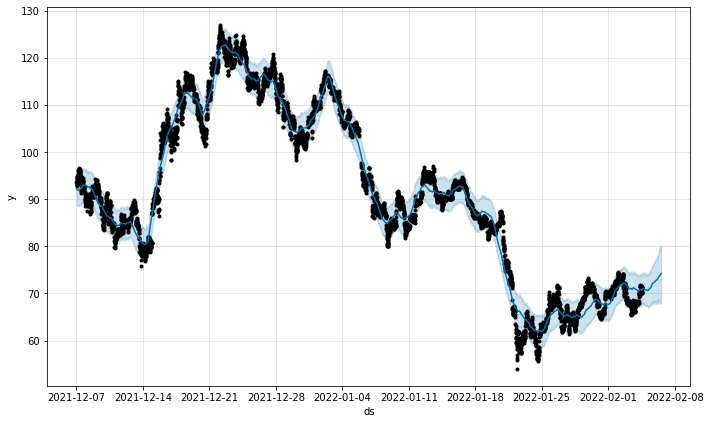

In [68]:
# Plot the predictions
fig1 = m.plot(forecast)

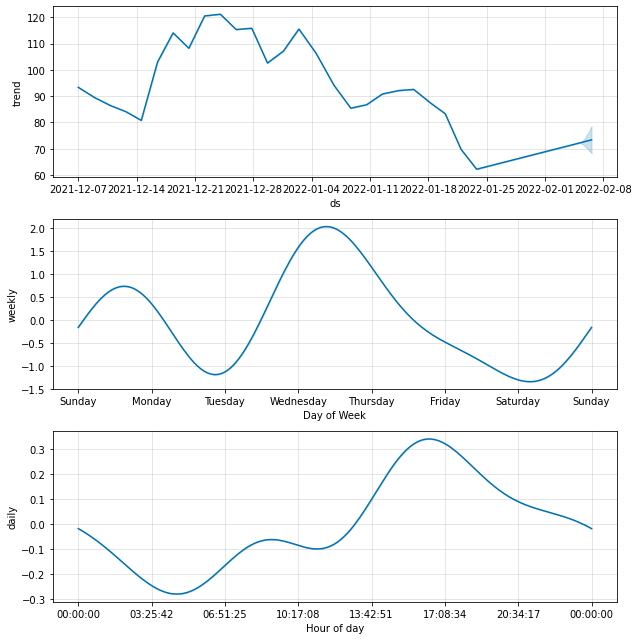

In [69]:
fig2 = m.plot_components(forecast)

In [61]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

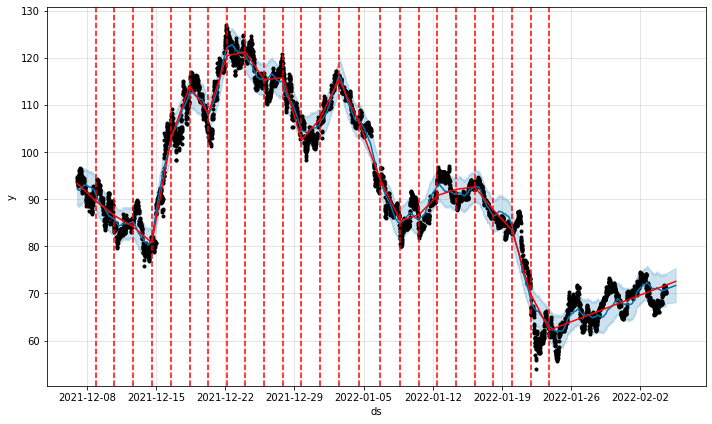

In [62]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)